In [52]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

# method 1 to visualize decision tree
from sklearn.tree import export_graphviz
# method 2 to visualize decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv("boston.csv")

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [17]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [18]:
# check for na
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [78]:
dtr = DecisionTreeRegressor(random_state=0)

In [79]:
X = df.drop('MEDV', axis=1)
y = df.MEDV

In [80]:
model = dtr.fit(X,y)

In [81]:
# method 1 to visualize decision tree

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
#export_graphviz(model, out_file ='tree.dot',
#feature_names = X.columns
# tree is exported to a word compatible .dot file. Open in MS Word. Copy the full structure.
# go to http://www.webgraphviz.com/ 
# paste in the textbox and click generate

In [82]:
# method 2 to visualize decision tree

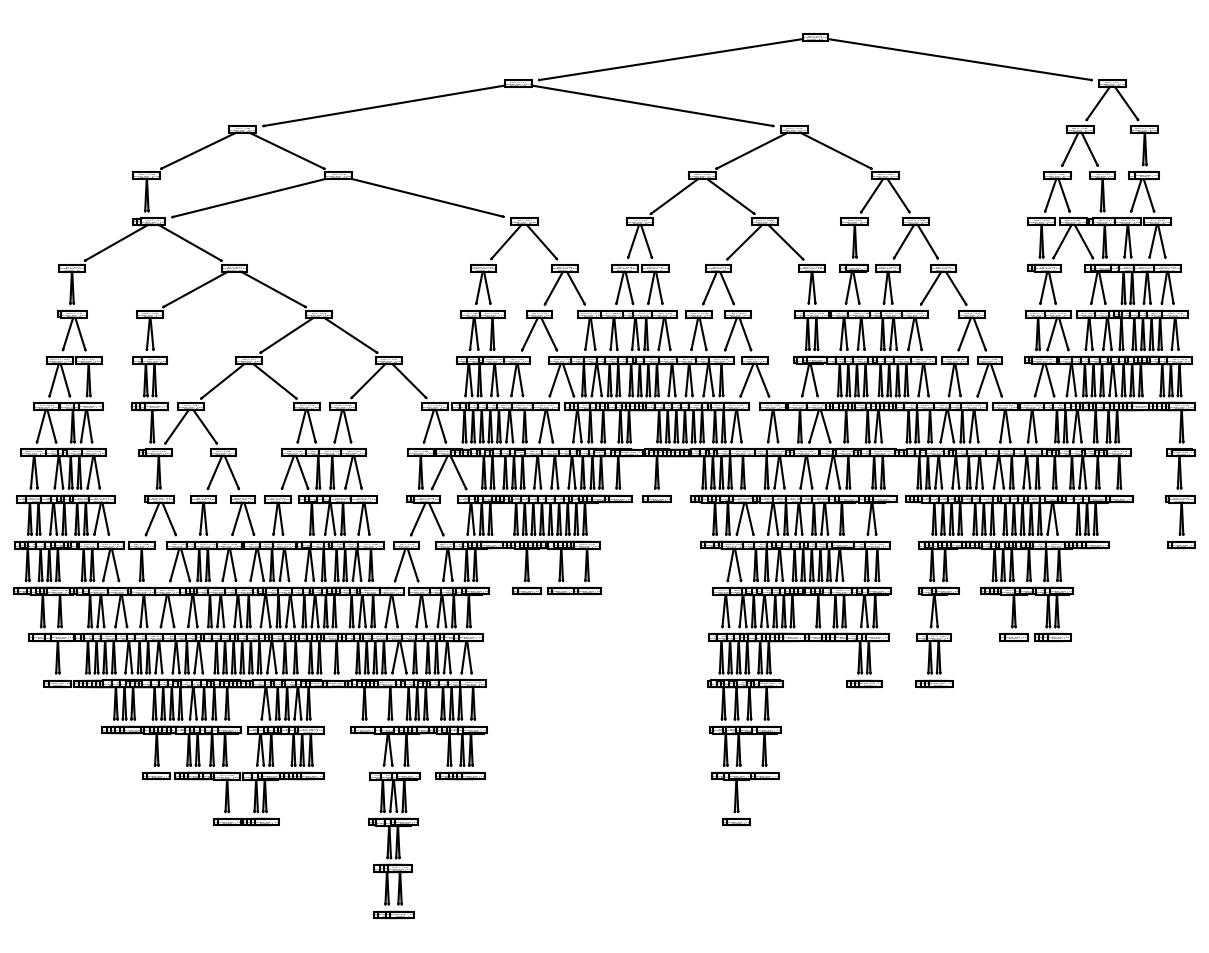

In [83]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

In [84]:
pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})

,features,importance
0,CRIM,0.039989
1,ZN,0.000601
2,INDUS,0.004099
3,CHAS,0.000847
4,NOX,0.050465
5,RM,0.575981
6,AGE,0.011533
7,DIS,0.073448
8,RAD,0.000714
9,TAX,0.012652


In [85]:
# expected value of residuals
np.mean(y - dtr.predict(X))

0.0

In [25]:
# abs residuals
abs_residuals = np.abs(y - dtr.predict(X))
# compute MAPE
np.mean(abs_residuals/y)*100

15.66698814020252

In [27]:
# using a library
mean_absolute_percentage_error(y, dtr.predict(X))

0.1566698814020252

In [32]:
# try different depths
for depths in range(2,10,1):
    dtrs = DecisionTreeRegressor(random_state=0,max_depth=depths)
    dtrs.fit(X,y)
    print("depth:", depths, "MAPE:", mean_absolute_percentage_error(y, dtrs.predict(X)))

depth: 2 MAPE: 0.19472687926597324
depth: 3 MAPE: 0.1566698814020252
depth: 4 MAPE: 0.1314584841806034
depth: 5 MAPE: 0.10674194859520439
depth: 6 MAPE: 0.08776118203565159
depth: 7 MAPE: 0.07047228802252327
depth: 8 MAPE: 0.05371012913746545
depth: 9 MAPE: 0.04081973319308911


In [33]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_mape = []
test_mape = []
grid_search_depths = range(2,30,1)
# try different depths
for depths in grid_search_depths:
    dtrs = DecisionTreeRegressor(random_state=0,max_depth=depths)
    dtrs.fit(X_train,y_train)

In [47]:
    train_mape.append(mean_absolute_percentage_error(y_train, dtrs.predict(X_train)))
    test_mape.append(mean_absolute_percentage_error(y_test, dtrs.predict(X_test)))

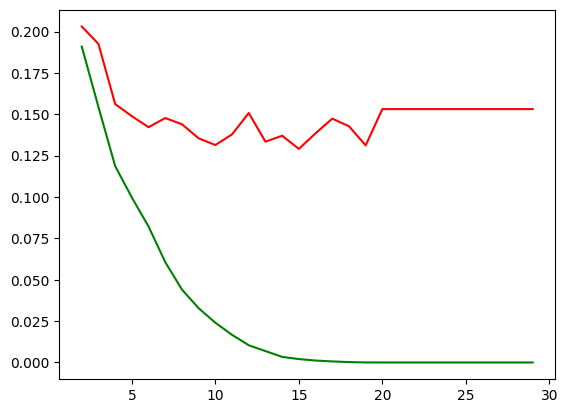

In [48]:
plt.plot(grid_search_depths,train_mape,c='g');
plt.plot(grid_search_depths,test_mape,c='r');

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Create your regression model
model = LinearRegression()

# Perform cross-validation and include train scores in the results
scoring = ['neg_mean_squared_error']
cv_results = cross_validate(model, X, y, scoring=scoring, cv=5, return_train_score=True)

# Access the train and test scores for each fold
train_scores = cv_results['train_neg_mean_squared_error']
test_scores = cv_results['test_neg_mean_squared_error']


In [56]:
train_scores

array([-24.5892302 , -22.24092194, -21.19051839, -12.91756328,
       -22.73718934])

In [57]:
test_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])